# <center>FINAL PROJECT: International Football After War II<center>

# *Team Information

| FULL NAME             | ID NUMBER |
| :-----------          |     :----:|
| Nguyễn Thiện Hoàng Trí| 20127088  |
| Nguyễn Phước Gia Huy  | 20127038  |


---

## 1. Introduction

### 1.1. Data information

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

The data is gathered from several sources including but not limited to Wikipedia, rsssf.com, and individual football associations' websites.

License: CC0: Public Domain (No copyright). You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

### 1.2. Attribute information

- `results.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `home_score` - full-time home team score including extra time, not including penalty-shootouts
    - `away_score` - full-time away team score including extra time, not including penalty-shootouts
    - `tournament` - the name of the tournament
    - `city` - the name of the city/town/administrative unit where the match was played
    - `country` - the name of the country where the match was played
    - `neutral` - TRUE/FALSE column indicating whether the match was played at a neutral venue
- `shootouts.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `winner` - winner of the penalty-shootout
- `goalscorers.csv` includes the following columns:
    - `date` - date of the match
    - `home_team` - the name of the home team
    - `away_team` - the name of the away team
    - `team` - name of the team scoring the goal
    - `scorer` - name of the player scoring the goal
    - `own_goal` - whether the goal was an own-goal
    - `penalty` - whether the goal was a penalty
    
#### NOTE:
Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

### 1.3. Why we select this dataset?
Currently, World Cup 2022 has been received a great deal of public concern over the world. Also both of us are a big fan of this tournament so we decide to explore and analyze more about dataset about football events. After selecting carefully on Kaggle, we find that this dataset ([here](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)) has enough information we need for our project.

## 2. Data Exploration

### IMPORT

In [40]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
fbmatches_df = pd.read_csv("results.csv")
scorers_df = pd.read_csv("goalscorers.csv")
penalty_df = pd.read_csv("shootouts.csv")

In [42]:
scorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


### How many rows and columns in dataset?
Use pandas to find the number of rows and columns and store in 2 lists `num_rows` and `num_cols`.

In [43]:
RC={}
num_rows=[]
num_cols=[]

num_rows.append(fbmatches_df.shape[0])
num_rows.append(scorers_df.shape[0])
num_rows.append(penalty_df.shape[0])

num_cols.append(fbmatches_df.shape[1])
num_cols.append(scorers_df.shape[1])
num_cols.append(penalty_df.shape[1])

RC['num_rows']=num_rows
RC['num_cols']=num_cols

RC_df=pd.DataFrame(RC,index=['fbmatches_df','scorers_df','penalty_df'])
RC_df

,num_rows,num_cols
fbmatches_df,44353,9
scorers_df,41008,8
penalty_df,547,4


### What is the meaning of each row? Are there any 2 rows with different meaning?
According to data description of the course and by taking a quick look at the data, each line provides information about a match. It seems that there is no outlier line.

### Is the data duplicated?
We going to check that if the value of variable is 1 , the data is duplicated and vice versa

In [44]:
#results.csv
fbmatches_df.index.duplicated().sum() 

0

In [45]:
#goalscorers.csv
scorers_df.index.duplicated().sum() 

0

In [46]:
#shootouts.csv
penalty_df.index.duplicated().sum()

0

### What is the current data type of each column? Are there columns having inappropriate data types?

We  check the datatype (`dtype`) of each element in a column in `fbmatches_df`,`scorers_df`,`penalty_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [47]:
col_dtypes=fbmatches_df.dtypes
col_dtypes
fbmatches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
 6   city        44353 non-null  object
 7   country     44353 non-null  object
 8   neutral     44353 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [48]:
col_dtypes=scorers_df.dtypes
col_dtypes

date          object
home_team     object
away_team     object
team          object
scorer        object
minute       float64
own_goal        bool
penalty         bool
dtype: object

In [49]:
col_dtypes=penalty_df.dtypes
col_dtypes


date         object
home_team    object
away_team    object
winner       object
dtype: object

All the columns have the suitable datatype.

### With each numerical column, how are values distributed?
It looks like that the datatype of columns are numeric. According to this approach, there will be 4 numeric columns ("home_score", "away_score" , "minute" and "date").

In [50]:
fbmatches_df['date']=pd.to_datetime(fbmatches_df['date'],format="%Y-%m-%d")
scorers_df['date']=pd.to_datetime(scorers_df['date'],format="%Y-%m-%d")
penalty_df['date']=pd.to_datetime(penalty_df['date'],format="%Y-%m-%d")

In [51]:
max_=[]
min_=[]
missing_val=[]

max_.append(max(fbmatches_df['date']))
max_.append(max(fbmatches_df['home_score']))
max_.append(max(fbmatches_df['away_score']))
max_.append(max(scorers_df['minute']))

min_.append(min(fbmatches_df['date']))
min_.append(min(fbmatches_df['home_score']))
min_.append(min(fbmatches_df['away_score']))
min_.append(min(scorers_df['minute']))

missing_val.append(fbmatches_df[fbmatches_df['date'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['home_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(fbmatches_df[fbmatches_df['away_score'].isna()].shape[0]/fbmatches_df.shape[0] *100)
missing_val.append(scorers_df[scorers_df['minute'].isna()].shape[0]/scorers_df.shape[0] *100)

new_number_df=pd.DataFrame(columns=['Max','Min','Missing values'])
new_number_df['Max']=max_
new_number_df['Min']=min_
new_number_df['Missing values']=missing_val

new_number_df.index = ['date','home_score', 'away_score','minute']


new_number_df

,Max,Min,Missing values
date,2022-12-18 00:00:00,1872-11-30 00:00:00,0.000000
home_score,31,0,0.000000
away_score,21,0,0.000000
minute,122.0,1.0,0.629146


### How does the categorical data distribute? 
For each of categorical column, compute the percentage of missing values, number of different values (missing values are not counted), a list of different values (missing values are not counted) and store them into a dataframe named cate_col_profiles_df. 

Categorical data of `fbmatches_df`:

In [52]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','tournament','city','country'])

cate_col_profiles_df.loc['missing_ratio']=fbmatches_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(fbmatches_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=fbmatches_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=fbmatches_df['home_team'].dropna().unique()
new_list['away_team']=fbmatches_df['away_team'].dropna().unique()
new_list['tournament']=fbmatches_df['tournament'].dropna().unique()
new_list['city']=fbmatches_df['city'].dropna().unique()
new_list['country']=fbmatches_df['country'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,tournament,city,country
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,311.0,306.0,141.0,2010.0,267.0
diff_vals,"[Scotland, England, Wales, Northern Ireland, U...","[England, Scotland, Wales, Northern Ireland, C...","[Friendly, British Home Championship, Évence C...","[Glasgow, London, Wrexham, Blackburn, Belfast,...","[Scotland, England, Wales, Ireland, United Sta..."


Categorical data of `scorers_df`:

In [53]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','team','scorer'])

cate_col_profiles_df.loc['missing_ratio']=scorers_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(scorers_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=scorers_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=scorers_df['home_team'].dropna().unique()
new_list['away_team']=scorers_df['away_team'].dropna().unique()
new_list['team']=scorers_df['team'].dropna().unique()
new_list['scorer']=scorers_df['scorer'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,team,scorer
missing_ratio,0.0,0.0,0.0,0.119489
num_diff_vals,220.0,220.0,220.0,13376.0
diff_vals,"[Chile, Argentina, Brazil, Uruguay, Paraguay, ...","[Uruguay, Chile, Brazil, Argentina, Paraguay, ...","[Uruguay, Argentina, Chile, Brazil, Paraguay, ...","[José Piendibene, Isabelino Gradín, Alberto Oh..."


Categorical data of `penalty_df`:

In [54]:
new_list={}
cate_col_profiles_df=pd.DataFrame(columns=['home_team','away_team','winner'])

cate_col_profiles_df.loc['missing_ratio']=penalty_df[cate_col_profiles_df.keys()].isnull().sum()*100/len(penalty_df[cate_col_profiles_df.keys()])
cate_col_profiles_df.loc['num_diff_vals']=penalty_df[cate_col_profiles_df.keys()].nunique()

new_list['home_team']=penalty_df['home_team'].dropna().unique()
new_list['away_team']=penalty_df['away_team'].dropna().unique()
new_list['winner']=penalty_df['winner'].dropna().unique()

cate_col_profiles_df=cate_col_profiles_df.append(new_list,ignore_index=True)
cate_col_profiles_df=cate_col_profiles_df.rename(index={0: "missing_ratio", 1: "num_diff_vals", 2: "diff_vals"})
cate_col_profiles_df

,home_team,away_team,winner
missing_ratio,0.0,0.0,0.0
num_diff_vals,162.0,172.0,159.0
diff_vals,"[India, South Korea, Thailand, Senegal, Guinea...","[Taiwan, Vietnam Republic, Iraq, South Korea, ...","[Taiwan, South Korea, Iraq, Thailand, Ghana, G..."


## 3. Frame the problems
[I/ How has football been adopted over time?]()
- Benefit: Have an overview to know more about why football was popular more and more over time . Learn the origin of football (where football come from) and know which are the top of tournaments in the world. As an fan of football, can take a look of top ten teams of each continents and know whether my team in that top ten.
- Small problems:
    - [1. We will illustrate how each country on each continent has approached football from the beginning of football every decade. We just judge on teams which belong to Confederation of their continents.]()
    - [2. How many matches of each tournaments not include `Friendly` from 1870 to 2022?]()


[II/ How are the teams playing in the World Cup?]() 
- Benefit: From there we have a more specific view of the participating countries, strong teams and their playing strategies.
- Small problems:
    - [1. Look over the number of national teams participating over the decades.]()
    - [2. Look over the goal of strongest teams - Top 10 teams that have the most total goals over decades.]()
    - [3. Based on the results of the goals scored in halves, find the ways of playing - the tactics of the teams.]()

[III/ Does an individual influence the overall outcome of a match? Is the top scorer leading the national team to victory or not?]()
- Benefit: Get to know the top scorers each season and their impact on the team, their ability to change the game in the game. Create a premise to make the right choices. Through it know more achievements of teams and individuals recorded in the World Cups.
- Small problems:
    - [1. The relationship between top scorer and top scorer team.]()
    - [2. Does the top scorer always help team in top 3?]()

[IV/ Which teams will join the round of 16 in FIFA World Cup 2022? Which team will be the champion?]()
- Benefit: Not for bad purposing. Answer this question will help us know the ability of each team and make a good prediction for a match when enjoy the football match with friends.
- Small problems:

    - [1. Firtly, we have to preprocess our data which is suitable for predicting features.]()
    - [2. Create a model by three attribute `average_rank`,`rank_difference`,`point_difference` to predict the target `is_won`.]()
    - [3. This time for World Cup simulation, we need to get all teams which attending to Official World Cup and those groups phase matches.]()
    - [4. Simulate the group stage and predict the winner of each match by visualize 8 table at the end.]()
    - [5. Simulate the Round of 16 and predict the winner of each match by visualize 2 table at the end.]()
    - [6. Now two winner of each match sorted beside from top to bottom respectively will pair up a match for next rounds from Quater stage to Final.]()



## 4. Preprocessing

### Add column `team winner` to dataframe

We need the information of match status that illustrate the winner of the match to answer a question. Therefore, before analyzing data to answer questions, you should preprocess by adding column "team winner" to `fbmatches_df`.

In [56]:
fbmatches_df['team winner'] = fbmatches_df.apply(lambda x : x['home_team'] if x['home_score'] > x['away_score'] 
                                              else (x['away_team'] if x['home_score'] < x['away_score'] else np.nan),
                                              axis=1)
fbmatches_df['year']=pd.DatetimeIndex(fbmatches_df['date']).year
fbmatches_df['decade']=pd.DatetimeIndex(fbmatches_df['date']).year - pd.DatetimeIndex(fbmatches_df['date']).year %10

In [57]:
fbmatches_df=fbmatches_df.reset_index(drop=True)
scorers_df=scorers_df.reset_index(drop=True)
penalty_df=penalty_df.reset_index(drop=True)

In [58]:
football_df=pd.merge(fbmatches_df,penalty_df,how='left',on=['date','home_team','away_team'])
football_df['team winner']=football_df.apply(lambda x : x['winner'] 
                                             if not pd.isnull(x['winner']) and  pd.isnull(x['team winner']) else x['team winner'],axis=1)
football_df.drop(columns=['winner'],inplace=True)

football_df['away_team'] = football_df['away_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['away_team'] = football_df['away_team'].replace(['Yemen DPR'], 'Yemen')
football_df['home_team'] = football_df['home_team'].replace(['Vietnam Republic'], 'Vietnam')
football_df['home_team'] = football_df['home_team'].replace(['Yemen DPR'], 'Yemen')
football_df['away_team'] = football_df['away_team'].replace(['German DR'], 'Germany')
football_df['home_team'] = football_df['home_team'].replace(['German DR'], 'Germany')

football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,NaN,1872,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,H,England,1873,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,H,Scotland,1874,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,NaN,1875,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,H,Scotland,1876,1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,Pathum Thani,Thailand,False,A,Taiwan,2022,2020
44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,Hanoi,Vietnam,False,H,Vietnam,2022,2020
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,H,Croatia,2022,2020
44351,2022-12-17,Singapore,Maldives,3,1,Friendly,Singapore,Singapore,False,H,Singapore,2022,2020


## 5. Data analyzing to answer questions

### I/ How has football been adopted over time?
Over a century , football has became wellknown and common for everyone in the world. So we will give you an overview of football during a century by anwsering this question.

### 1. We will illustrate how each country on each continent has approached football from the beginning of football every decade. We just judge on teams which belong to Confederation of their continents.
- Split the football_df dataframe into 6 list coresponding to each continents.(Compare the number of members of each continents follow by this wikipedia ([link](https://en.wikipedia.org/wiki/List_of_football_federations)).
- Create a dataframe `Countries_df` with 3 columns `Team`,`Confederation`,`Region` to save teams belong to each confederation and their region.
- Create a dataframe `Team_df` which contain all countries from `football_df` and finding their first decade approching to football.
- Merge `Team_df` with `Countries_df` to have their own confederation for helping us to visual our analyzation.

In this section, to find the confederation of each teams:
- Finding `tournament` have acronym of 6 confederation or the most popular for this confederation.

In [59]:
# Những năm đầu tiên được chơi bóng
AFC_df = fbmatches_df[(fbmatches_df['tournament'].str.contains('AFC',case=False)) & (fbmatches_df["tournament"].str.contains("NAFC") == False)]
CONMEBOL_df = fbmatches_df[fbmatches_df['tournament'].str.contains('COPA América',case=False)]
UEFA_df = fbmatches_df[fbmatches_df['tournament'].str.contains('UEFA',case=False) & (fbmatches_df["tournament"].str.contains("CONMEBOL") == False)]
CAF_df = fbmatches_df[fbmatches_df['tournament'].str.contains('African ',case=False) & (fbmatches_df["tournament"].str.contains("West") == False)]
CONCACAF_df =fbmatches_df[fbmatches_df['tournament'].str.contains('CONCACAF',case=False)]

AFC_df=AFC_df.reset_index(drop=True) # Asian
CONMEBOL_df=CONMEBOL_df.reset_index(drop=True) # South America
UEFA_df=UEFA_df.reset_index(drop=True) # European
CAF_df=CAF_df.reset_index(drop=True) # Africa
CONCACAF_df=CONCACAF_df.reset_index(drop=True) # North America

# Those data below is not in correct confederation so we have to remove them from that conferderation list.
CAF_df= CAF_df[CAF_df['away_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['away_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['away_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['away_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['away_team'] != 'Tahiti']
CAF_df= CAF_df[CAF_df['away_team'] != 'Saint Pierre and Miquelon']

CAF_df= CAF_df[CAF_df['home_team'] != 'Guadeloupe' ]
CAF_df= CAF_df[CAF_df['home_team'] != 'French Guiana']
CAF_df= CAF_df[CAF_df['home_team'] != 'New Caledonia']
CAF_df= CAF_df[CAF_df['home_team'] != 'Mayotte']
CAF_df= CAF_df[CAF_df['home_team'] != 'Tahiti']

# Making a list of each confederation by the dataframe above or filling directly if those conferderation have a small number of countries.
AFC= list(AFC_df['away_team'].sort_values().unique())
CAF= list(CAF_df['away_team'].sort_values().unique())
UEFA= list(UEFA_df['away_team'].sort_values().unique())
CONCACAF= list(CONCACAF_df['away_team'].sort_values().unique())
CONMEBOL= ['Argentina' ,'Bolivia' ,'Brazil' ,'Chile' ,'Colombia' ,'Ecuador' ,'Paraguay' ,'Peru' ,'Uruguay','Venezuela']
OFC = ['American Samoa' ,'Cook Islands' ,'Fiji' ,'Kiribati' ,'New Caledonia' ,'New Zealand' 
          ,' Niue' ,'Papua New Guinea' ,'Samoa','Solomon Islands','Tahiti','Tonga','Tuvalu','Vanuatu']

# Create a dataframe which matching correctly all countries with their conferderation and region.
Countries_df = pd.DataFrame({
    'Team': AFC + CAF  + CONCACAF + CONMEBOL + OFC + UEFA,
    'Confederation' : ['AFC'] * len(AFC) + ['CAF'] * len(CAF) + ['CONCACAF'] * len(CONCACAF) + ['CONMEBOL'] * len(CONMEBOL) + ['OFC'] * len(OFC) + ['UEFA'] * len(UEFA),
    'Region' : ['Asia'] * len(AFC) + ['Africa'] * len(CAF) + ['North and Central America'] * len(CONCACAF) + ['South America'] * len(CONMEBOL) + ['Oceania'] * len(OFC) + ['Europe'] * len(UEFA),
})

# List all teams in `football_df` dataframe from both home team and away team.
# Make sure that there are no duplicated teams in this list.
Teams=list(football_df['home_team'].unique()) + list(football_df['away_team'].unique())
Teams_df=pd.DataFrame({'Team': list(set(Teams))})

# Caculate the first year and decade of each team when they have the first match 
Teams_df['First year']=Teams_df['Team'].apply(lambda x : football_df[(football_df['home_team']==x) | (football_df['away_team']==x)]['year'].values[0])
Teams_df['First decade']=Teams_df['First year']-Teams_df['First year']%10

# Merge two dataframe by 'Team' column then sort by first year columns.
Teams_df=Teams_df.merge(Countries_df,how='left',on=['Team'])
Teams_df.sort_values(by='First year',inplace=True)

After having a needed dataframe, we group them by `first decade` and `region`. Then unstack by `Region` to have the information of region reaching football first time.

In [60]:
new_teams_decade_region_df= Teams_df.groupby(['First decade','Region']).size().unstack('Region')

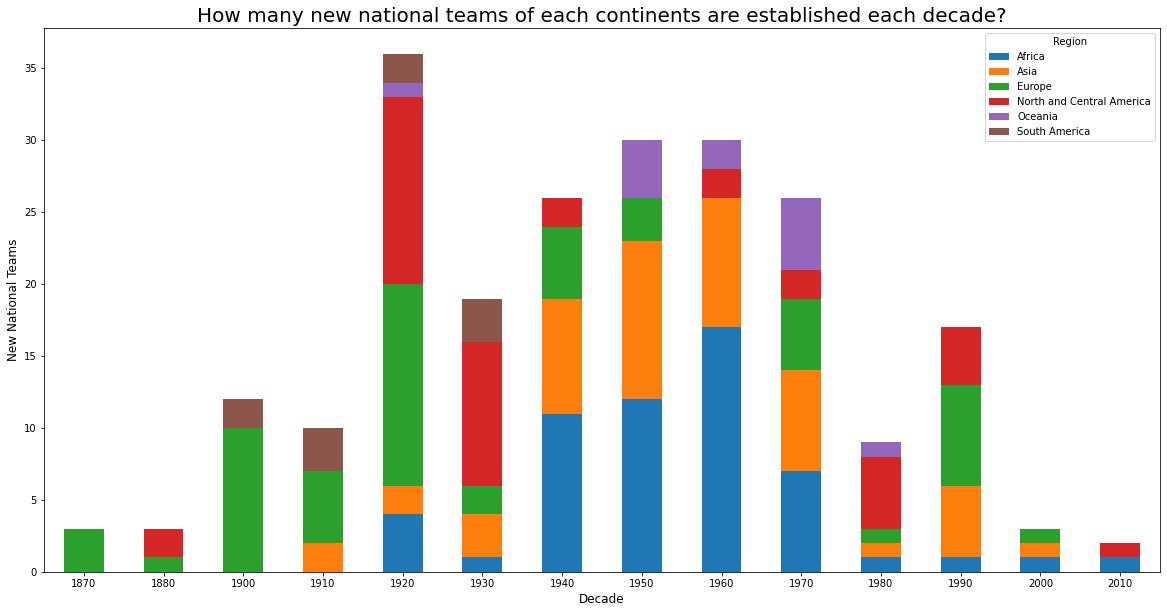

In [61]:
ax = new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('How many new national teams of each continents are established each decade?', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='New National Teams', size=12)
plt.xticks(rotation=0);

It was witnessed that: 
- Europe was the first continents develop football sport in 1870. During the next 5-decade period, there are lot of countries in Europe started to play football. So we could say that football comes from Europe.
- After Europe , North and Central America was the next continent started to play football. It was not until 1920 that there were have new teams attending to play soccers.
- South America and Asia started to play football in 1910.
- Most of countries from all continents start their first matchs between 1920 and 1970. So that period was the time football spread widely over the world.

### 2. How many matches of each tournaments not include `Friendly` from 1870 to 2022?
- Drop all rows with not official tournaments.
- Create `Tournament_df` to save the information for each tournament like: `Tournaments`,`Total_match`.   

In [62]:
football_df = football_df[football_df['tournament'] != 'Friendly']
football_df=football_df.reset_index(drop=True)
Tournament_df=pd.DataFrame({'tournament': list(football_df['tournament'].unique())})
Tournament_df['Total match']= Tournament_df['tournament'].apply(lambda x: len(football_df[(football_df['tournament']==x) & (~football_df['tournament'].str.contains('qualification',case=False))]))
top10_tournament_df=Tournament_df.sort_values(by='Total match', ascending=False).head(10)

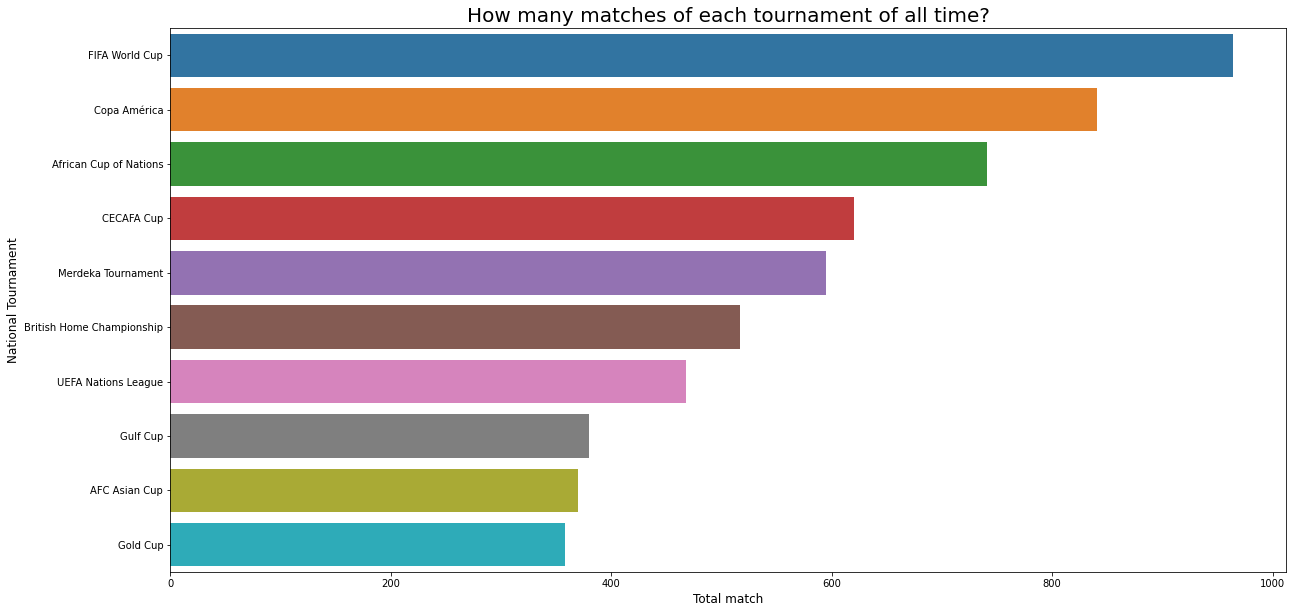

In [63]:
plt.figure(figsize=(20,10))
axs= sns.barplot(x=top10_tournament_df['Total match'], y=top10_tournament_df['tournament'], orient='h')
axs.set_title('How many matches of each tournament of all time?', size=20)
axs.set_xlabel(xlabel='Total match', size=12)
axs.set_ylabel(ylabel='National Tournament', size=12);

It was witnessed that FIFA World Cup was the biggest tournament on the planet which was established by FIFA organization(under 1000 matches during a century period between 1930 and 2022)

Create `status_tem` dict to store a list of teams in `football_df` also fill 0 in all values in dict to easy to create a `Point_df`:
- `Point_df` has 2 attributes which are `Point` and `Team` to show the total point of each team from 1870 to now.
    - `Point` would be +0 if team lose the match.
    - `Point` would be +3 if team win the match.
    - `Point` would be +1 if the match is draw.
- Merge 2 dataframe `Point_df` and `Countries_df` to take conferderation and region for each team.
- Sort values from top to bottom of each Confederation to take the top 10 of each Confederation.

In [64]:
Status_team={}
Teams=list(set(list(football_df['home_team'].unique()) + list(football_df['away_team'].unique())))

Status_team= dict.fromkeys(Teams,0)
Point_df=pd.DataFrame({'Team': Status_team.keys(),'Point': Status_team.values()})
Draw_df=football_df[football_df['team winner'].isnull()] # Dataframe save all matches are draw

Point_df['Point']= Point_df['Team'].apply(lambda x : len(football_df[football_df['team winner']==x])*3 )

# Take the current point + number of draw matches of the team in home side and away side.
Point_df['Point']=Point_df.apply(lambda x : x['Point']+len(Draw_df[Draw_df['home_team']==x['Team']])+len(Draw_df[Draw_df['away_team']==x['Team']]),axis=1)

# Merge 2 dataframe to take conferderation and region for each team.
Final_points_df=pd.merge(Point_df,Countries_df,how='left',on=['Team'])

# Sort values from top to bottom of each Confederation to take the top 10 of each Confederation.
Asia_ranked_top10=Final_points_df[Final_points_df['Confederation']=='AFC'].sort_values(by='Point',ascending=False).head(10)
Africa_ranked_top10=Final_points_df[Final_points_df['Confederation']=='CAF'].sort_values(by='Point',ascending=False).head(10)
Europe_ranked_top10=Final_points_df[Final_points_df['Confederation']=='UEFA'].sort_values(by='Point',ascending=False).head(10)
NCAmerica_ranked_top10=Final_points_df[Final_points_df['Confederation']=='CONCACAF'].sort_values(by='Point',ascending=False).head(10)
SAmerica_ranked_top10=Final_points_df[Final_points_df['Confederation']=='CONMEBOL'].sort_values(by='Point',ascending=False).head(10)
Oceania_ranked_top10=Final_points_df[Final_points_df['Confederation']=='OFC'].sort_values(by='Point',ascending=False).head(10)

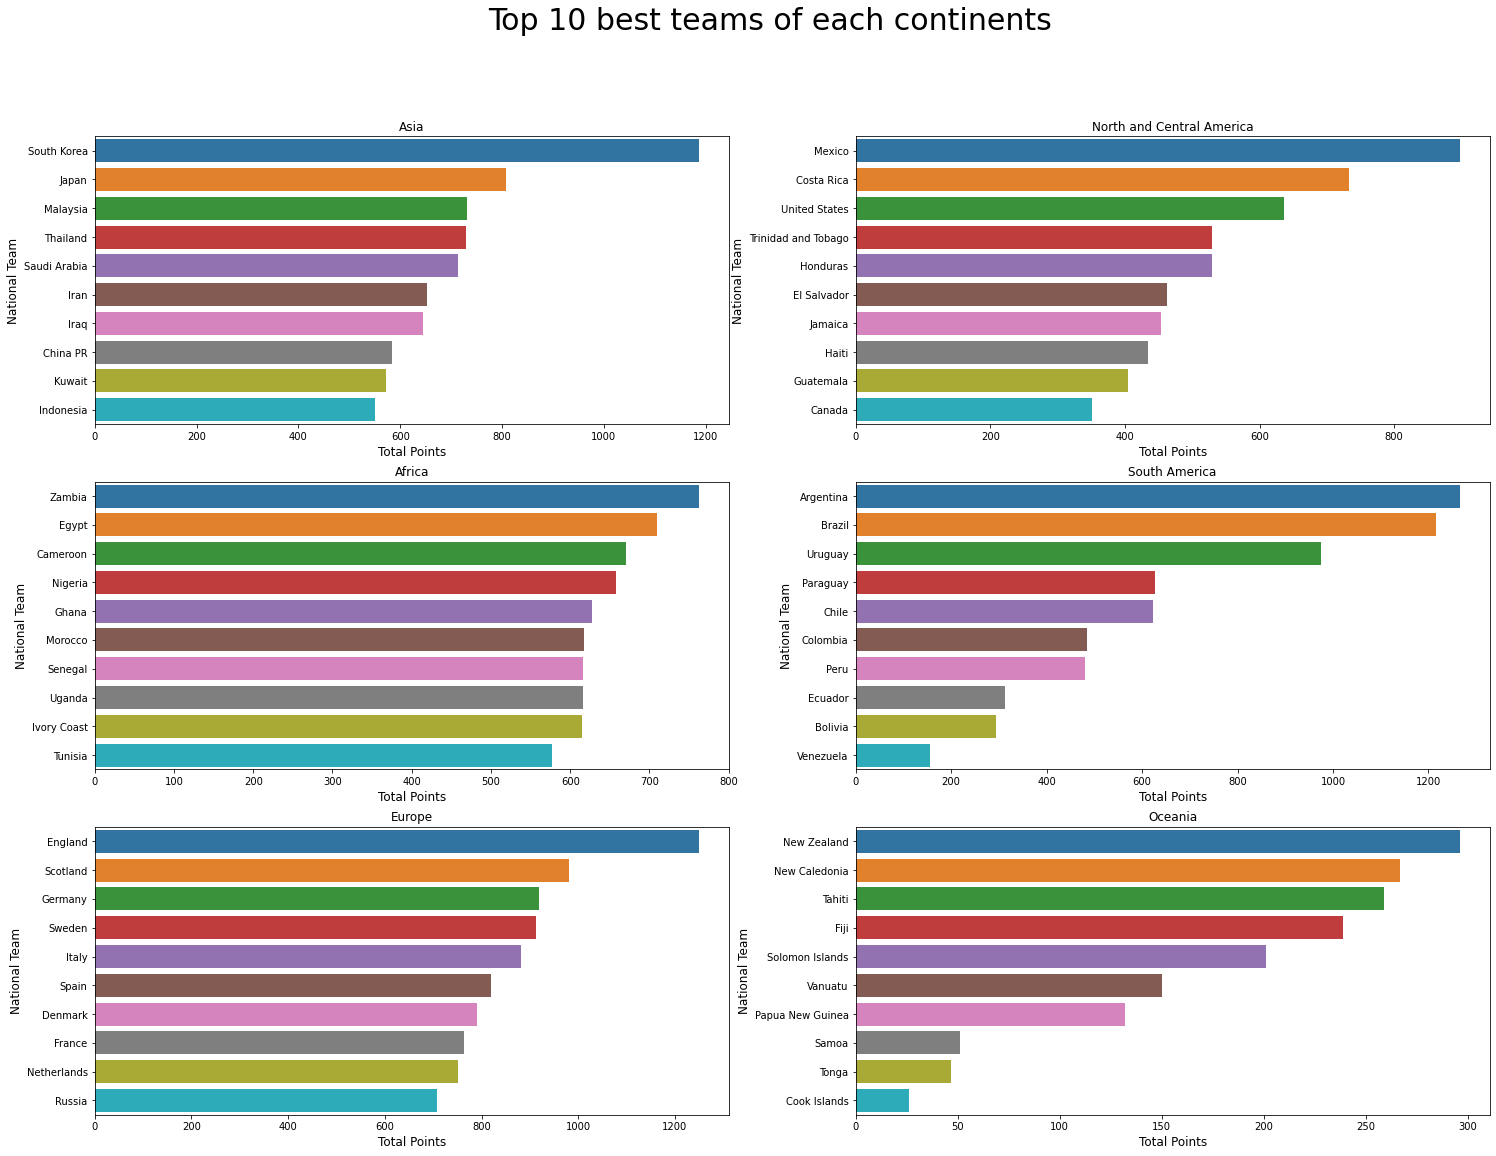

In [65]:
fig, axs = plt.subplots(3, 2, figsize=(25, 18))
fig.suptitle('Top 10 best teams of each continents',size=30)
sns.barplot(y=Asia_ranked_top10['Team'], x=Asia_ranked_top10['Point'], orient='h',ax=axs[0][0])

sns.barplot(y=Africa_ranked_top10['Team'], x=Africa_ranked_top10['Point'], orient='h',ax=axs[1][0] )
sns.barplot(y=Europe_ranked_top10['Team'], x=Europe_ranked_top10['Point'], orient='h',ax=axs[2][0] )
sns.barplot(y=NCAmerica_ranked_top10['Team'], x=NCAmerica_ranked_top10['Point'], orient='h',ax=axs[0][1] )
sns.barplot(y=SAmerica_ranked_top10['Team'], x=SAmerica_ranked_top10['Point'], orient='h',ax=axs[1][1] )
sns.barplot(y=Oceania_ranked_top10['Team'], x=Oceania_ranked_top10['Point'], orient='h',ax=axs[2][1] )

axs[0][0].set_xlabel(xlabel='Total Points', size=12)
axs[0][0].set_ylabel(ylabel='National Team', size=12);
axs[1][0].set_xlabel(xlabel='Total Points', size=12)
axs[1][0].set_ylabel(ylabel='National Team', size=12);
axs[2][0].set_xlabel(xlabel='Total Points', size=12)
axs[2][0].set_ylabel(ylabel='National Team', size=12);
axs[0][1].set_xlabel(xlabel='Total Points', size=12)
axs[0][1].set_ylabel(ylabel='National Team', size=12);
axs[1][1].set_xlabel(xlabel='Total Points', size=12)
axs[1][1].set_ylabel(ylabel='National Team', size=12);
axs[2][1].set_xlabel(xlabel='Total Points', size=12)
axs[2][1].set_ylabel(ylabel='National Team', size=12);

axs[0][0].set_title("Asia")
axs[1][0].set_title("Africa")
axs[2][0].set_title("Europe")
axs[0][1].set_title("North and Central America")
axs[1][1].set_title("South America")
axs[2][1].set_title("Oceania");


- According to Asia bar chart , it is true that there are several big teams leading Asia rank like South Korea, Japan, Saudi Arabia. Noticeably, Malaysia and Thailand which are East South Asia countries ranked third and fourth of Asia rank.
- At Africa , 5 biggest teams of Africa dominated the Africa rank. (Zambia , Egypt, Cameroon, Nigeria, and Ghana)
- At Europe , There are three countries dominating the ranking board of all time ( England Germany and Schotland ) 
- At North and Central America, Mexico and Costa Rica lead this ranking board.
- At South America, Argentina and Brazil definitely lead the ranking board with their population in football.
- At Ocenia, Neww Zealand and New Caledonia are ranked first in Ocenia.
#### Conclusion:
Football was such a fantastic sports. Based on analyzation above , many tournaments have been established to attract more people to become football fans. Also more and more countries participated in football over time showing the coverage of football to all over the world was such an incredible.



### II. How are the teams playing in the World Cup? From there we have a more specific view of the participating countries, strong teams and their playing strategies.

#### 1. Look over the number of national teams participating over the decades
- Firstly, we have seen that world cup have 2 tournaments. There are `FIFA World Cup` and `FIFA World Cup qualification`.
- Secondly, the World Cup was not held in 1942 and 1946 because of the world war II and before that it was held firstly in 1930 but it organized on a rather small scale, so that we decide to take only data since 1949 (The 1950 World Cup).
- And add `season` colcumn to dataframe to easy for analyzing.

In [66]:
worldcup_df=football_df[(football_df['tournament'].isin(["FIFA World Cup","FIFA World Cup qualification"])) & (football_df['year']>=1949)].copy().reset_index(drop=True)
worldcup_df.loc[:,'season']=(worldcup_df['date'].dt.year+1)//4*4+2
worldcup_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade,season
0,1949-06-02,Sweden,Republic of Ireland,3,1,FIFA World Cup qualification,Solna,Sweden,False,H,Sweden,1949,1940,1950
1,1949-06-26,Switzerland,Luxembourg,5,2,FIFA World Cup qualification,Zürich,Switzerland,False,H,Switzerland,1949,1940,1950
2,1949-08-21,Yugoslavia,Israel,6,0,FIFA World Cup qualification,Belgrade,Yugoslavia,False,H,Yugoslavia,1949,1940,1950
3,1949-09-08,Republic of Ireland,Finland,3,0,FIFA World Cup qualification,Dublin,Republic of Ireland,False,H,Republic of Ireland,1949,1940,1950
4,1949-09-18,Israel,Yugoslavia,2,5,FIFA World Cup qualification,Tel Aviv,Israel,False,A,Yugoslavia,1949,1940,1950


- We synthesize lists of national teams attending in each season

In [67]:

def mix(x:pd.Series):
    return (list(set(x['home_team'].tolist()+x['away_team'].tolist())))

wc_home_team=worldcup_df.groupby(["season"])["home_team"].unique()
wc_away_team=worldcup_df.groupby(["season"])["away_team"].unique()
wc_team=pd.concat([wc_home_team,wc_away_team],axis=1).apply(mix,axis=1)

wc_team.head()

season
1950    [Brazil, Northern Ireland, Wales, Italy, Scotl...
1954    [Norway, Northern Ireland, Wales, Italy, Brazi...
1958    [Netherlands, Brazil, Italy, Northern Ireland,...
1962    [Cyprus, Netherlands, Northern Ireland, Wales,...
1966    [Cyprus, Netherlands, Northern Ireland, Italy,...
dtype: object

- Because of there are too much seasons, so we decide to visualize in decades, in that order we combine seasons data into decades.
- Countries are being classified by region, so that it can be more detail to describe, I guess.

In [68]:
# Make temporary dataframe that inlude countries participating each decade and it's region. 
tmp=wc_team.explode().reset_index(name='Team')
tmp.loc[:,'decade']=tmp['season']//10*10
tmp=tmp.drop(columns=['season']).drop_duplicates()
tmp=tmp.merge(Teams_df[['Team','Region']],how='left',on=['Team'])

# We only need to the number of countries, so we count countries of each decade.
wc_new_teams_decade_region_df=tmp.groupby(['decade','Region']).size().unstack(level=1)
wc_new_teams_decade_region_df

Region,Africa,Asia,Europe,North and Central America,Oceania,South America
decade,,,,,,
1950,2.0,6.0,30.0,8.0,NaN,8.0
1960,5.0,5.0,31.0,10.0,NaN,10.0
1970,29.0,19.0,33.0,13.0,1.0,10.0
1980,32.0,26.0,33.0,4.0,2.0,10.0
1990,41.0,39.0,53.0,29.0,9.0,10.0
2000,52.0,45.0,52.0,35.0,11.0,10.0
2010,54.0,48.0,55.0,35.0,10.0,10.0
2020,54.0,48.0,55.0,34.0,7.0,10.0


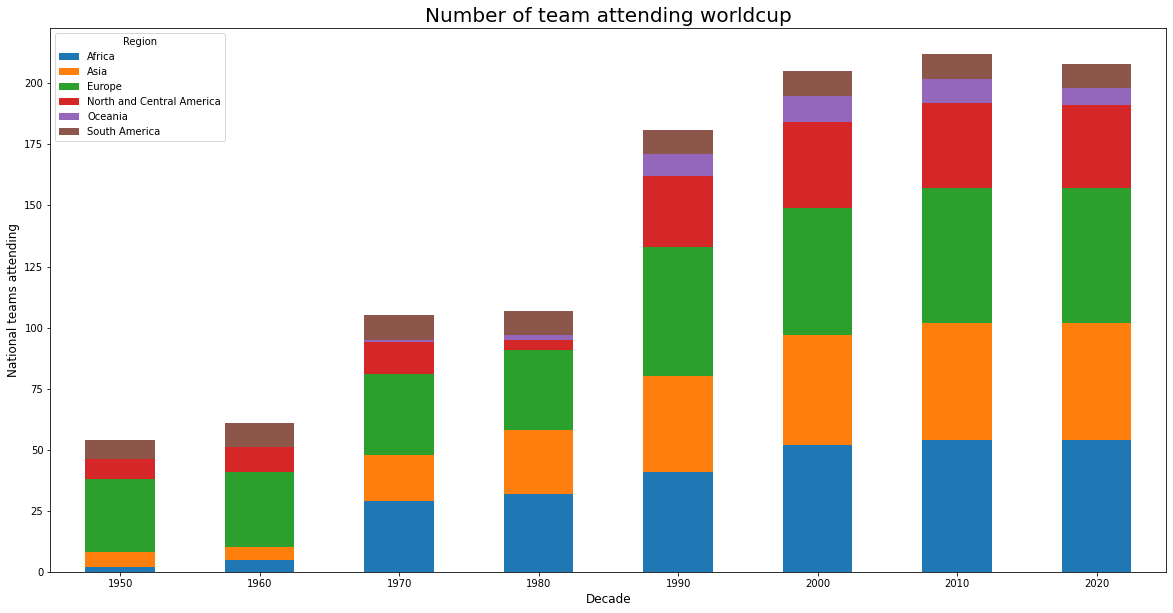

In [69]:

ax = wc_new_teams_decade_region_df.plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('Number of team attending worldcup', size=20)
ax.set_xlabel(xlabel='Decade', size=12)
ax.set_ylabel(ylabel='National teams attending', size=12)
plt.xticks(rotation=0);

Look at the bar chart upper, we can see that the number of countries have been increasing notificationally, now a day the number of national team participanting is 4 times more than in 1950s. And the World Cup is not only famous in Europe and America, Africa and Asia are two areas that take up the largest proportions. So that we can see that the World Cup is a significant event. Because of that, this project has people understand more about this tournament and help football teams and fans make a suitable strategy. Discussing tactics is also an entertainment for football lovers.


#### 2. Look over the goal of strongest teams - Top 10 teams that have the most total goals over decades. 

- Firstly, if we want to know the number goals of strongest teams, we would need to determine who are strongest teams. We need to find the list of 10  countries that have achieved most total goals from 1950 to now. 
- But before find top 10 teams, we need to make a specific dataframe `wc_team_score_df` only for this `task 2` to analyze data easier, this dataframe we need columns of `team`, `competitor`, `tournament` and `date` to identificate the match and know the scores of `first_half`, `second_half`, `extra_time` and `total_score`. We add `seaon` and `decade` columns in order to be easy to group matches - of course.  
  

In [70]:
# create init dataframe, each match is divided into 2 data rows in the dataframe, home team is the 'team' and away team is the 'competitor' and vice versa.
a=worldcup_df[['date','home_team','away_team','season','tournament']].rename(columns={'home_team':'team','away_team':'competitor'})
b=worldcup_df[['date','home_team','away_team','season','tournament']].rename(columns={'home_team':'competitor','away_team':'team'})
wc_team_score_df=a.merge(b,how='outer',on=['date','team','competitor','season','tournament']).sort_values(by='date').reset_index(drop=True)


# merge with scores_df dateframe to have more detail of team goal each match.
wc_score_df=wc_team_score_df.merge(scorers_df[['date','team','scorer','minute']],how='left',on=['date','team']).sort_values(by='date')

# Spilt team goal data into 3 small dataframe of half_score, full_score and extra_time_score 
wc_half_score=wc_score_df[wc_score_df['minute']<=45].groupby(['date','team']).size().reset_index(name='first_half')
wc_full_score=wc_score_df[(45<wc_score_df['minute']) & (wc_score_df['minute']<=90)].groupby(['date','team']).size().reset_index(name='second_half')
wc_extra_time_score=wc_score_df[wc_score_df['minute']>90].groupby(['date','team']).size().reset_index(name='extra_time')

# Merge 3 small dataframe into wc_team_score_df - add 3 columns: 'first_half', 'second_half', 'extra_time'.
wc_team_score_df=wc_team_score_df.merge(wc_half_score,how='left',on=['date','team'])
wc_team_score_df=wc_team_score_df.merge(wc_full_score,how='left',on=['date','team'])
wc_team_score_df=wc_team_score_df.merge(wc_extra_time_score,how='left',on=['date','team'])

# These are some cells that will be nan because team did not goal, so that fill these with 0. 
wc_team_score_df.fillna(0,inplace=True)

# add total_score and decade columns
wc_team_score_df.loc[:,'total_score']=wc_team_score_df[['first_half','second_half','extra_time']].sum(axis=1)
wc_team_score_df.loc[:,'decade']=wc_team_score_df['season']//10*10

wc_team_score_df

,date,team,competitor,season,tournament,first_half,second_half,extra_time,total_score,decade
0,1949-06-02,Sweden,Republic of Ireland,1950,FIFA World Cup qualification,2.0,1.0,0.0,3.0,1950
1,1949-06-02,Republic of Ireland,Sweden,1950,FIFA World Cup qualification,1.0,0.0,0.0,1.0,1950
2,1949-06-26,Switzerland,Luxembourg,1950,FIFA World Cup qualification,3.0,2.0,0.0,5.0,1950
3,1949-06-26,Luxembourg,Switzerland,1950,FIFA World Cup qualification,1.0,1.0,0.0,2.0,1950
4,1949-08-21,Yugoslavia,Israel,1950,FIFA World Cup qualification,4.0,2.0,0.0,6.0,1950
...,...,...,...,...,...,...,...,...,...,...
17476,2022-12-14,France,Morocco,2022,FIFA World Cup,1.0,1.0,0.0,2.0,2020
17477,2022-12-17,Morocco,Croatia,2022,FIFA World Cup,1.0,0.0,0.0,1.0,2020
17478,2022-12-17,Croatia,Morocco,2022,FIFA World Cup,2.0,0.0,0.0,2.0,2020
17479,2022-12-18,Argentina,France,2022,FIFA World Cup,2.0,0.0,1.0,3.0,2020


- We only take FIFA World Cup tournament- of course because World Cup hosts do not need to participate qualification and neither did the champion in the past (this has now been removed)  

In [71]:
top10_country=list(wc_team_score_df[wc_team_score_df['tournament']=='FIFA World Cup'].groupby(['team'])['total_score'].sum().sort_values(ascending=False)[:10].index)
top10_country

['Germany',
 'Brazil',
 'Argentina',
 'France',
 'Italy',
 'England',
 'Spain',
 'Netherlands',
 'Russia',
 'Uruguay']

- We already have the list of 10 top teams, so let calculate the total number of goals scored by the teams in each decade. 

In [72]:
# group data by team and decade and sum their goal.
top10_country_score_df=wc_team_score_df[wc_team_score_df['team'].isin(top10_country)].groupby(['team','decade'])['total_score'].sum().unstack(level=1)

# Add total_score and sortby it to easily see when visualize
top10_country_score_df.loc[:,'total_score']=top10_country_score_df.sum(axis=1)
top10_country_score_df.sort_values(by='total_score',inplace=True)

top10_country_score_df

decade,1950,1960,1970,1980,1990,2000,2010,2020,total_score
team,,,,,,,,,
Uruguay,35.0,20.0,21.0,13.0,37.0,50.0,114.0,24.0,314.0
Russia,23.0,49.0,24.0,52.0,57.0,45.0,54.0,19.0,323.0
Italy,22.0,32.0,64.0,29.0,61.0,50.0,64.0,13.0,335.0
France,69.0,21.0,21.0,63.0,42.0,23.0,81.0,34.0,354.0
Spain,35.0,18.0,24.0,24.0,97.0,65.0,97.0,24.0,384.0
Argentina,15.0,26.0,37.0,34.0,55.0,84.0,101.0,42.0,394.0
Netherlands,12.0,10.0,74.0,24.0,87.0,60.0,99.0,43.0,409.0
England,54.0,32.0,22.0,47.0,66.0,45.0,100.0,52.0,418.0
Brazil,56.0,18.0,75.0,42.0,61.0,94.0,102.0,48.0,496.0


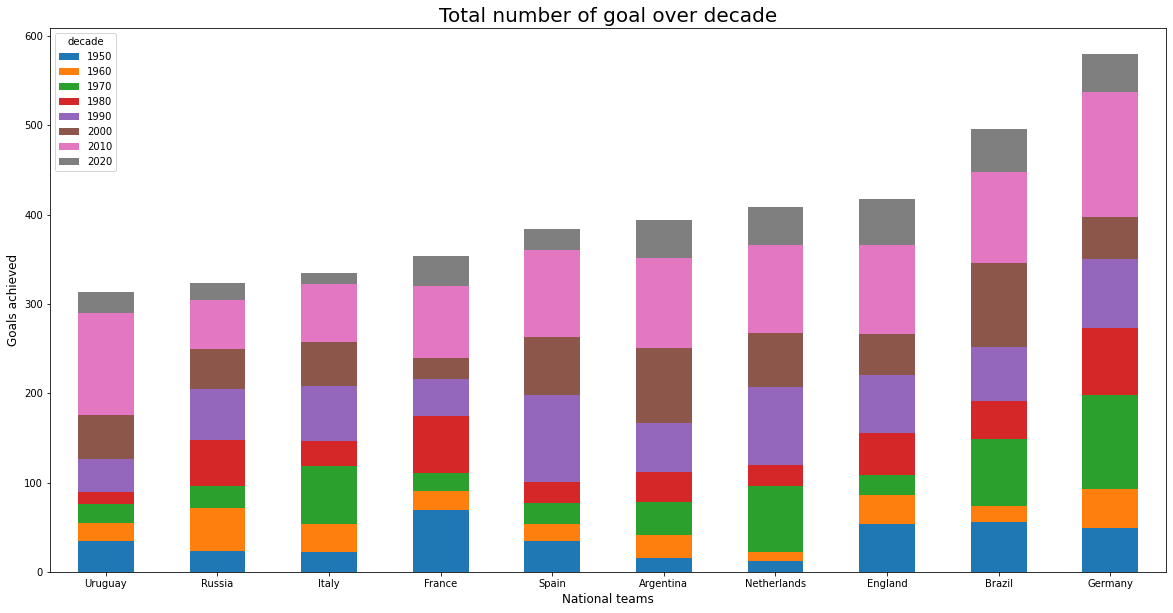

In [73]:
ax = top10_country_score_df.drop(columns=['total_score']).plot(kind='bar', stacked=True, figsize=(20,10));
ax.set_title('Total number of goal over decade', size=20)
ax.set_xlabel(xlabel='National teams', size=12)
ax.set_ylabel(ylabel='Goals achieved', size=12)
plt.xticks(rotation=0);

Each column shows the number of goals scored by each country, and each column is divided into segments (decades) by color representing the number of goals scored by that team in the corresponding period.

It can be seen that Germany is a country with great destructive power, scoring more goals than Brazil, the team that has won the most championships. The number of goals that Germany has achieved is almost double that of the 10th ranked team, Uruguay, and that form has been consistent over the years. As time goes on, teams seem to score more goals. It seems that later on, the teams focus on scoring more. From there, you can see the professionalism of the teams.

#### 3. Based on the results of the goals scored in halves, find the ways of playing - the tactics of the teams.
(Note: Select the 10 countries identified above for the sample)

- We have 3 types of definitions:
    - Early attacking team: attack quickly in the first half and defend in the second half.
    - Late attacking team: the first half will defend and attack in the second half.
    - Stable team: the number of points scored in the 1st and 2nd half is almost equal.

- We normalize the number of goals they scored in the first and second half to a float value from -1 to 1. The closer to -1, the more likely a team to be ‘early attacking’, the closer to 1, the more likely a team to be ‘late attacking’, and the closer it is to 0, the more stable the team is.
- To normalize, we let value is -1 when first half score more than second half, value is 1 when first half score less than second half and 0 two half is equal. After that, taking mean of each team in each season. 


In [74]:
def check_Play_Style(x: pd.Series):
    if x['first_half']>x['second_half']:
        return -1
    return int(x['first_half']<x['second_half'])

wc_team_score_df.loc[:,'style']=wc_team_score_df.apply(check_Play_Style,axis=1)

# remove the match that team have 0 goal in both half, because it is invalid
play_style_df=wc_team_score_df[(wc_team_score_df['first_half']!=0) | (wc_team_score_df['second_half']!=0)].groupby(['team','season'])['style'].mean()[top10_country].unstack(level=0)
play_style_df


team,Germany,Brazil,Argentina,France,Italy,England,Spain,Netherlands,Russia,Uruguay
season,,,,,,,,,,
1950,NaN,0.333333,NaN,0.000000,0.000000,0.250000,0.125000,NaN,NaN,0.500000
1954,0.500000,0.142857,NaN,0.400000,0.600000,0.333333,0.500000,NaN,NaN,0.400000
1958,-0.166667,0.571429,0.166667,0.000000,0.333333,0.666667,-0.250000,-0.250000,0.250000,0.666667
1962,-0.166667,0.800000,0.000000,0.333333,1.000000,-0.142857,0.166667,0.000000,-0.375000,-0.200000
1966,-0.111111,0.000000,-0.200000,-0.285714,0.400000,0.200000,0.400000,0.250000,0.166667,0.400000
1970,0.214286,0.416667,0.333333,0.000000,-0.250000,0.666667,0.000000,-0.200000,0.400000,0.000000
1974,-0.090909,0.666667,-0.333333,1.000000,0.000000,-0.333333,0.000000,0.000000,1.000000,0.000000
1978,-0.333333,-0.100000,0.000000,0.000000,-0.272727,0.200000,0.600000,0.083333,0.000000,-0.333333
1982,-0.071429,0.666667,0.500000,-0.153846,0.071429,0.200000,0.666667,0.166667,-0.090909,0.333333


- Normalize one more time, if value >=0.2 then new value is 1, else if value =<-0.2 then new value is -1 and the rest is 0.
- so that we have (x*2.5000001) to scale value to round. when scale there some value out of [-1,1] so we need divide results by absolute value of it. It is 0 replace by 1 (0/1=0)
- After normalize, we calulate the mean of seasons.

In [75]:
((play_style_df*2.5000001).round()/(play_style_df*2.5000001).round().abs().replace(0,1)).mean()

team
Germany        0.277778
Brazil         0.578947
Argentina     -0.176471
France         0.333333
Italy          0.052632
England        0.473684
Spain          0.578947
Netherlands    0.294118
Russia         0.235294
Uruguay        0.210526
dtype: float64

Most of team are 'late attacking', there only argentina is negative value but it more likely to be 'stable team'.
- But we just see some top teams,is it bias? Show more, we are seeing the average goal of each half in all seasons (>1949)

In [76]:
goal_time_season=wc_team_score_df.groupby('season')[['first_half','second_half']].mean()

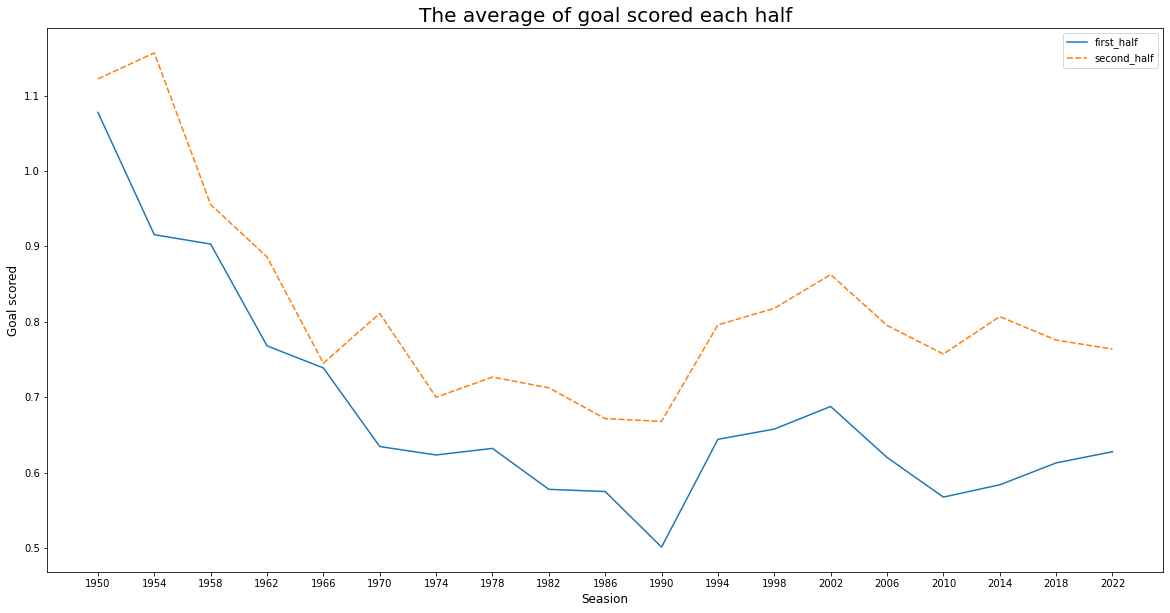

In [104]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=goal_time_season)
ax.set_title('The average of goal scored each half', size=20)
ax.set_xlabel(xlabel='Seasion', size=12)
ax.set_ylabel(ylabel='Goal scored', size=12)
ax.set(xticks=goal_time_season.index);

We can the orange 2nd half line is upper the blue one that is the 1st half. That the average scorce of second half alway higher than the first half. It can be seen that the second half is more dramatic, the teams push harder to attack in second half. It can be said that not ending 90 minutes has not known the results yet.

In [78]:
penalty_df.groupby(['winner'])['date'].size().sort_values(ascending=False)[:5]


# penalty_df[(penalty_df['home_team']=='Argentina') | (penalty_df['away_team']=='Argentina')]

winner
Argentina       14
South Korea     13
Egypt           13
Zambia          13
South Africa    11
Name: date, dtype: int64

### III/ Does an individual influence the overall outcome of a match? Is the top scorer leading the national team to victory or not?

#### 1. The relationship between top scorer and top scorer team.
        (Note: if there are many top scorer, we are going to take who have less penalty score)

- First, we need to find the top scorer of each season.

In [79]:

def find_Top_Goal_Scorer(x: pd.Series): # find out the list max player if filter who have less penalty score.
    max_goal=x['score'].max()
    top_scorer=x[x['score']==max_goal]
    min_pen=top_scorer['pen_score'].min()

    return top_scorer[top_scorer['pen_score']==min_pen]

# take scorers in world cup
top_goal_scorer=scorers_df[scorers_df['own_goal']==False].merge(worldcup_df[worldcup_df['tournament']=='FIFA World Cup'][['date','home_team','away_team','season']],how='inner',on=['date','home_team','away_team'])

#calculate the number total goals of scorers and pen_score of each season
#And use function `find_Top_Goal_Scorer` to take top scorers
top_goal_scorer=top_goal_scorer.groupby(['season','scorer','team'])['penalty'].agg(['size','sum']).reset_index().rename(columns={'size':'score','sum':'pen_score'}).groupby(['season'])[['scorer','team','score','pen_score']].apply(find_Top_Goal_Scorer)

#remove unnecessary label
top_goal_scorer=top_goal_scorer.reset_index().drop(columns='level_1')
top_goal_scorer

,season,scorer,team,score,pen_score
0,1950,Ademir de Menezes,Brazil,9,0
1,1954,Sándor Kocsis,Hungary,11,0
2,1958,Just Fontaine,France,13,0
3,1962,Dražan Jerković,Yugoslavia,4,0
4,1962,Flórián Albert,Hungary,4,0
5,1962,Garrincha,Brazil,4,0
6,1962,Valentin Kozmich Ivanov,Russia,4,0
7,1962,Vavá,Brazil,4,0
8,1966,Eusébio,Portugal,9,4
9,1970,Gerd Müller,Germany,10,1


- Second, we need to find the top scorer team of each season.

In [80]:
#calculate the number total goals of scorer team of each season
#And take top scorer team.
top_goal_team=wc_team_score_df[wc_team_score_df['tournament']=='FIFA World Cup'].groupby(['season','team'])['total_score'].sum().unstack(level=0).agg(['idxmax','max']).T
top_goal_team.rename(columns={'idxmax':'team','max':'score'},inplace=True)

top_goal_team

,team,score
season,,
1950,Brazil,22.0
1954,Hungary,27.0
1958,France,23.0
1962,Brazil,14.0
1966,Portugal,17.0
1970,Brazil,19.0
1974,Germany,46.0
1978,Argentina,15.0
1982,France,16.0


- Finnal, we are combine visualizing both dataframe to easily view and make comments.

Text(0.5, 1.0, 'The top scorer')

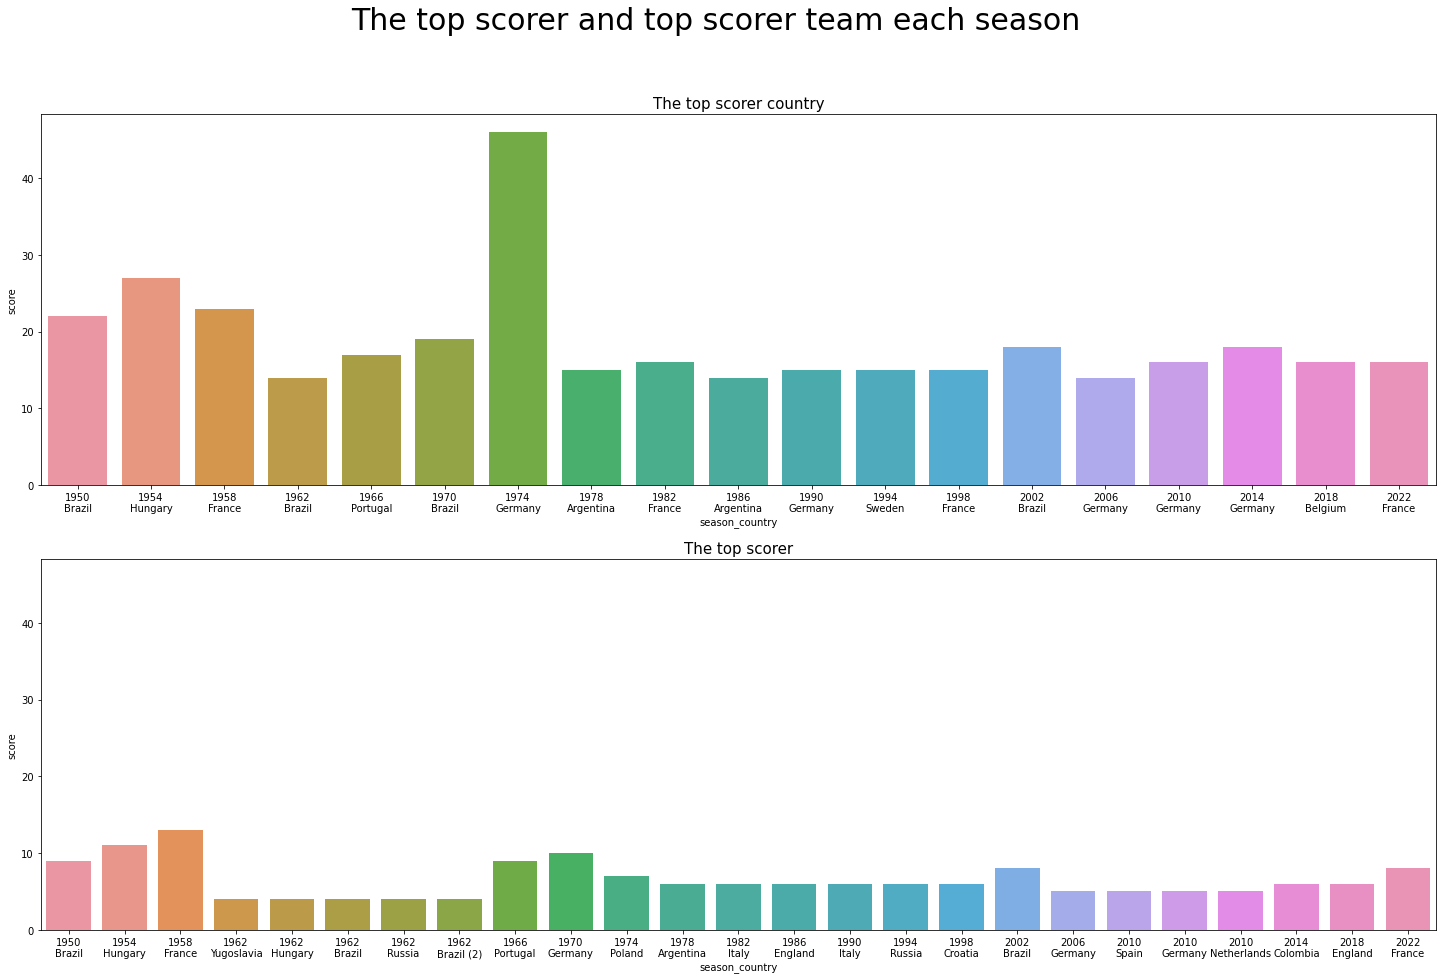

In [107]:
# combine season and country into new label
top_goal_team.loc[:,'season_country']=top_goal_team.apply(lambda x: str(x.name)+'\n'+x['team'],axis=1)

# combine season and country of top scorers intro new label and it have same element then add number behind it
top_goal_scorer.loc[:,'season_country']=top_goal_scorer.apply(lambda x: str(x['season'])+'\n'+x['team'],axis=1)
top_goal_scorer.loc[top_goal_scorer[top_goal_scorer['season_country'].duplicated()].index,'season_country']+=str(' (2)')


fig, axes = plt.subplots(2, 1, figsize=(25, 15), sharey=True)
fig.suptitle('The top scorer and top scorer team each season',size=30)

# top scorer team
sns.barplot(ax=axes[0], x=top_goal_team['season_country'], y=top_goal_team['score'])
axes[0].set_title('The top scorer country', size=15)

# top scorer
sns.barplot(ax=axes[1], x=top_goal_scorer['season_country'], y=top_goal_scorer['score'])
axes[1].set_title('The top scorer', size=15)

# plt.show()

There are only half amount of top score teams have top scorer. So an individual can influence, but not too much, the outcome of a match. Football is a sport that needs high solidarity. There are special cases, in 1962, Brazil has 2 top scorers, that make Brazil won championship and in 1974, Germany has a record highest number of goals but they do not have any top scorers that season.

#### 2. Does the top scorer always help team in top 3?
- We already have top scorer dataframe, so that we need to find the top3 teams every season.

In [82]:
# make list of top3 team [top1, top2, top3]. 
# take 2 last match of each season, who won the latest is top 1 and lose is top 2.
# Same with 2nd latest, won is top3 and drop top4.
def find_Last_Days(x: pd.Series):
    t=x.loc[x['date'].index[-2:]].set_index('date')
    top3=[x.iloc[-1]['team winner']]
    tmp=(x.iloc[-1][['home_team','away_team']].tolist())
    tmp.remove(top3[0])
    top3.extend(tmp)
    
    top3.append(x.iloc[-2]['team winner'])
    return top3

wc_top3=worldcup_df.groupby(['season']).apply(find_Last_Days)
wc_top3


season
1950             [Sweden, Spain, Uruguay]
1954          [Germany, Hungary, Austria]
1958             [Brazil, Sweden, France]
1962      [Brazil, Czechoslovakia, Chile]
1966         [England, Germany, Portugal]
1970             [Brazil, Italy, Germany]
1974       [Germany, Netherlands, Poland]
1978     [Argentina, Netherlands, Brazil]
1982             [Italy, Germany, Poland]
1986         [Argentina, Germany, France]
1990          [Germany, Argentina, Italy]
1994              [Brazil, Italy, Sweden]
1998            [France, Brazil, Croatia]
2002            [Brazil, Germany, Turkey]
2006             [Italy, France, Germany]
2010        [Spain, Netherlands, Germany]
2014    [Germany, Argentina, Netherlands]
2018           [France, Croatia, Belgium]
2022         [Argentina, France, Croatia]
dtype: object

In [108]:
# top_goal_scorer.loc[:,'top_3']=wc_top3
# top_goal_scorer.merge(wc_top3,how='left',on='season')

def check_if_in_top(x: pd.Series):
    try:
        return x['top_3'].index(x['team'])+1
    except:
        return np.NaN


top_goal_scorer.loc[:,'top']=top_goal_scorer.merge(wc_top3.reset_index(name='top_3'),how='left',on='season').apply(check_if_in_top ,axis=1)
top_goal_scorer[['season','scorer','team','score','top']]

,season,scorer,team,score,top
0,1950,Ademir de Menezes,Brazil,9,NaN
1,1954,Sándor Kocsis,Hungary,11,2.0
2,1958,Just Fontaine,France,13,3.0
3,1962,Dražan Jerković,Yugoslavia,4,NaN
4,1962,Flórián Albert,Hungary,4,NaN
5,1962,Garrincha,Brazil,4,1.0
6,1962,Valentin Kozmich Ivanov,Russia,4,NaN
7,1962,Vavá,Brazil,4,1.0
8,1966,Eusébio,Portugal,9,3.0
9,1970,Gerd Müller,Germany,10,3.0


Top scorer does not always help team in top 3, but has a great influence on it. Most of them are in the top 3 team, but not only few of them won the championship. Like the sentence above, football is high solidarity sport that with spear tip, you can move far but can not win the total.

### IV/ Which teams will join the round of 16 in FIFA World Cup 2022? Which team will be the champion?
Recently, the champion of FIFA World Cup 2022 has been received lots of consideration in all over the world. Now I will uses one more dataset to provide the Ranking of each countries from 1992 to 2022. But I just use the data which is after the end of FIFA World Cup 2018 and before the beginning of FIFA World Cup 2022 to make a prediction of Champion. The reason why I select like that is to analyze just games played at the preparation and classification to World Cup. And in this question our team will create a model that can help us to predict the winner of each match in World Cup stages.

#### 1. Firtly, we have to preprocess our data which is suitable for predicting features.
- Find all matches from `01/08/2018` to `06/10/2022`.
- Some teams in the World Cup have different names in the ranking's dataset. So, we need to adjust it.
- Drop all columns which does not need for our purposes (`country_abrv`,`previous_points`,`rank_change`).

In [84]:
import datetime
football_df=football_df.drop(columns=['team winner'])
football_df = football_df[(football_df['date'] > datetime.datetime(2018,8,1)) & (football_df['date']<=datetime.datetime(2022,10,6))]
Rank_df=pd.read_csv('fifa_ranking-2022-10-06.csv')
Rank_df["country_full"] = Rank_df["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States").str.replace("Brunei Darussalam", "Brunei")
Rank_df["country_full"] = Rank_df["country_full"].str.replace("Korea DPR", "North Korea").str.replace("Congo DR", "DR Congo").str.replace("Côte d'Ivoire", "Ivory Coast")
Rank_df=Rank_df.drop(columns=['country_abrv','previous_points','confederation','rank_change'])
Rank_df['rank_date']=pd.to_datetime(Rank_df['rank_date'],format="%Y-%m-%d")
football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,team winner,year,decade
23982,2018-09-01,Timor-Leste,Brunei,3,1,AFF Championship qualification,Kuala Lumpur,Malaysia,True,H,Timor-Leste,2018,2010
23983,2018-09-02,Guam,Northern Mariana Islands,4,0,EAFF Championship,Ulaanbaatar,Mongolia,True,H,Guam,2018,2010
23984,2018-09-02,Mongolia,Macau,4,1,EAFF Championship,Ulaanbaatar,Mongolia,False,H,Mongolia,2018,2010
23985,2018-09-04,Macau,Guam,2,0,EAFF Championship,Ulaanbaatar,Mongolia,True,H,Macau,2018,2010
23986,2018-09-04,Mongolia,Northern Mariana Islands,9,0,EAFF Championship,Ulaanbaatar,Mongolia,False,H,Mongolia,2018,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26759,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,A,Serbia,2022,2020
26760,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,D,NaN,2022,2020
26761,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,H,Kosovo,2022,2020
26762,2022-09-27,Greece,Northern Ireland,3,1,UEFA Nations League,Athens,Greece,False,H,Greece,2022,2020


Next, we need to find the nearest ranking date (before the match's date) for home team and away team and add those to new columns `rank_date_home` and `rank_date_away`. We need those 2 columns to merge 2 dataset later.

In [85]:
# Find the last rank date for home team and away team by compare team name and rank date must be lower than match date. 
def find_lastly_rank_date_home(x:pd.Series):
    try:
        return Rank_df[(Rank_df['country_full']==x['home_team']) & (Rank_df['rank_date']<x['date'])]['rank_date'].tolist()[-1] 
    except:
# If teams did not ranked in FIFA ranking , we would fill with nan values for those teams.
        return np.nan
    
def find_lastly_rank_date_away(x:pd.Series):
    try:
        return Rank_df[(Rank_df['country_full']==x['away_team']) & (Rank_df['rank_date']<x['date'])]['rank_date'].tolist()[-1]
# If teams did not ranked in FIFA ranked , we would fill with nan values for those teams.
    except:
        return np.nan
    
football_df['rank_date_home']=football_df.apply(lambda x: find_lastly_rank_date_home(x),axis=1)
football_df['rank_date_away']=football_df.apply(lambda x: find_lastly_rank_date_away(x),axis=1)
# Drop teams with not be ranked in FIFA ranking because of those team will not affect too much for teams in World Cup
football_df.dropna(inplace=True)

At this time, we need to merge 2 dataset in order to get a dataset FIFA games and its ranking.
- Merge by `team_name` and `rank_date` for each match with the suffixes `_home` and `_away` to know which information for home team and away team.
- Drop duplicated columns which means after merging there are some columns have the same data with different attributes because of our merging way.(`country_full_away`,`country_full_home`,`rank_date_home`,`rank_date_away`).
- Create features which needed to predict the winner of each match: `rank_difference` ,`average_rank` ,`point_difference` ,`is_won`.

In [86]:
football_df= football_df.merge(Rank_df,left_on=['rank_date_home', 'home_team'], right_on=['rank_date', 'country_full'])
football_df = football_df.merge(Rank_df, 
                         left_on=['rank_date_away', 'away_team'], 
                         right_on=['rank_date', 'country_full'], 
                         suffixes=('_home', '_away'))

football_df = football_df.loc[:,~football_df.columns.duplicated()].copy()
football_df.drop(columns=['country_full_away','country_full_home'],inplace=True)

# features help us know difference thing between winner and loser.
football_df['rank_difference'] = football_df['rank_home'] - football_df['rank_away']
football_df['average_rank'] = (football_df['rank_home'] + football_df['rank_away'])/2
football_df['point_difference'] = football_df['total_points_home'] - football_df['total_points_away']
football_df['score_difference'] = football_df['home_score'] - football_df['away_score'] # Note that this feature is not used in training
football_df['is_won'] = football_df['score_difference'] > 0 

football_df

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'rank_date_home'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_status,...,rank_date_away,rank_home,total_points_home,rank_away,total_points_away,rank_difference,average_rank,point_difference,score_difference,is_won
0,2018-09-01,Timor-Leste,Brunei,3,1,AFF Championship qualification,Kuala Lumpur,Malaysia,True,H,...,2018-08-16,190,912.00,195,900.00,-5,192.5,12.00,2,True
1,2018-09-02,Mongolia,Macau,4,1,EAFF Championship,Ulaanbaatar,Mongolia,False,H,...,2018-08-16,186,920.00,185,924.00,1,185.5,-4.00,3,True
2,2018-09-04,Macau,Guam,2,0,EAFF Championship,Ulaanbaatar,Mongolia,True,H,...,2018-08-16,185,924.00,190,912.00,-5,187.5,12.00,2,True
3,2018-09-04,Nepal,Pakistan,1,2,SAFF Cup,Dhaka,Bangladesh,True,A,...,2018-08-16,161,1004.00,201,884.00,-40,181.0,120.00,-1,False
4,2018-09-06,Bangladesh,Pakistan,1,0,SAFF Cup,Dhaka,Bangladesh,False,H,...,2018-08-16,194,904.00,201,884.00,-7,197.5,20.00,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,2022-09-27,Switzerland,Czech Republic,2,1,UEFA Nations League,St. Gallen,Switzerland,False,H,...,2022-08-25,16,1621.43,32,1502.90,-16,24.0,118.53,1,True
2011,2022-09-27,Republic of Ireland,Armenia,3,2,UEFA Nations League,Dublin,Republic of Ireland,False,H,...,2022-08-25,47,1442.48,92,1242.42,-45,69.5,200.06,1,True
2012,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,A,...,2022-08-25,36,1488.57,25,1549.53,11,30.5,-60.96,-2,False
2013,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,H,...,2022-08-25,106,1183.90,108,1180.52,-2,107.0,3.38,4,True


#### 2. Create a model by three attribute `average_rank`,`rank_difference`,`point_difference` to predict the target `is_won`
- Check if y has any null values.
- Using `Logictic Regression` algorithm for creating a model. Because of this algorithm suitable for predict binary results. In our case, `is_won` get only 2 values: `True` for home winner and `False` for away draw/winner.

In [87]:
X,y=football_df.loc[:,['average_rank','rank_difference','point_difference']],football_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
y.isnull().values.any()

False

In [89]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Train accuracy

In [90]:
model.score(X_train, y_train)

0.7841191066997518

Test accuracy

In [91]:
model.score(X_test,y_test)

0.7146401985111662

#### 3. This time for World Cup simulation, we need to get all teams which attending to Official World Cup and those groups phase matches.
- Create a dataframe which has `Group`,`Team` information and also the `date` before the first match of World Cup.
- Create another dataframe which has FIFA ranking information for all teams in this World Cup.

In [92]:
Group_WC={'A': ['Netherlands','Qatar','Ecuador','Senegal'],
          'B': ['England','United States','Iran','Wales'],
          'C': ['Argentina','Poland','Mexico','Saudi Arabia'],
          'D': ['France', 'Australia','Tunisia','Denmark'],
          'E': ['Japan', 'Spain','Germany','Costa Rica'],
          'F': ['Morocco','Croatia','Belgium','Canada'],
          'G': ['Brazil','Switzerland','Cameroon','Serbia'],
          'H': ['Portugal','South Korea','Uruguay','Ghana']}
        
World_cup_df=pd.DataFrame({'Group': Group_WC.keys(),'Team': Group_WC.values()})
World_cup_df=World_cup_df.explode('Team').reset_index(drop=True)
World_cup_df['date']=datetime.datetime(2022,11,20) # Take the time before the beginning of Qatar World Cup
World_cup_df


,Group,Team,date
0,A,Netherlands,2022-11-20
1,A,Qatar,2022-11-20
2,A,Ecuador,2022-11-20
3,A,Senegal,2022-11-20
4,B,England,2022-11-20
5,B,United States,2022-11-20
6,B,Iran,2022-11-20
7,B,Wales,2022-11-20
8,C,Argentina,2022-11-20
9,C,Poland,2022-11-20


In [93]:
# Create World_cup_rank_df dataframe for saving ranking information of teams attending Qatar World Cup
World_cup_rank_df=Rank_df.loc[(Rank_df['rank_date']==Rank_df['rank_date'].max()) & (Rank_df['country_full'].isin(World_cup_df['Team'].unique()))].reset_index(drop='True')
World_cup_rank_df

,rank,country_full,total_points,rank_date
0,1,Brazil,1841.30,2022-10-06
1,28,South Korea,1530.30,2022-10-06
2,30,Tunisia,1507.54,2022-10-06
3,31,Costa Rica,1503.59,2022-10-06
4,38,Australia,1488.72,2022-10-06
5,41,Canada,1475.00,2022-10-06
6,43,Cameroon,1471.44,2022-10-06
7,44,Ecuador,1464.39,2022-10-06
8,26,Poland,1548.59,2022-10-06
9,24,Japan,1559.54,2022-10-06


#### 4. Simulate the group stage and predict the winner of each match by visualize 8 table at the end.  
We select 2 members from a group for pairing and create a match for them and predict the winner for this match.
- Create a dataframe that save needed features between home team and away team for model predicting.
- Predicting the winner by save winning probability of home team to `home_win_prob` for process below:
    - The winner will be home team if `home_win_prob` >= 0.55 => `Home team get 3 points`
    - The winner will be away team if `home_win_prob` <= 0.45 => `Away team get 3 points`
    - Home team and away team will draw if  0.<5  `home_win_prb` < 0.55
 => `Both team get 1 points`
- Add `tot4al_prob` and `points` columns to `World_cup_df`  to help us find the top 2 in each table easily.
- Add `Match_1`,`Match_2`,`Match_3` columns to `World_cup_df` to help us know more about probability of each teams.

In [94]:
# Group
from itertools import combinations
World_cup_df['total_prob']=0
World_cup_df['points']=0

World_cup_df['Match_1']=0
World_cup_df['Match_2']=0
World_cup_df['Match_3']=0

# This function will fill the winning probability of which match in each team. 
def Find_match(Team,pros): 
    if (World_cup_df.loc[Team,'Match_1'].values[0]==0):
        World_cup_df.loc[Team,'Match_1']=pros
    elif (World_cup_df.loc[Team,'Match_2'].values[0]==0):
        World_cup_df.loc[Team,'Match_2']=pros
    elif (World_cup_df.loc[Team,'Match_3'].values[0]==0): 
        World_cup_df.loc[Team,'Match_3']=pros

# Select each group for matching.
for group in list(World_cup_df['Group'].unique()):
    # Choose 2 member of this group for matching
    for home , away in  combinations(World_cup_df[World_cup_df['Group']==group]['Team'],2):

        #Create a dataframe that save needed features between home team and away team for model predicting.
        Distance_rank=pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]),columns=X.columns)
        Distance_rank['average_rank']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]+World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])/2
        Distance_rank['rank_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])
        Distance_rank['point_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['total_points'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['total_points'].values[0])
        
        # Save the predicting result of winning probability in home team to home_win_prob variable.
        home_win_prob = model.predict_proba(Distance_rank)[:,1][0]
        World_cup_df.loc[World_cup_df[World_cup_df['Team']==home].index,'total_prob'] += home_win_prob
        World_cup_df.loc[World_cup_df[World_cup_df['Team']==away].index,'total_prob'] += 1-home_win_prob
        
        points=0;
        
        # Team away wil be the winner if home_win_prb < 0.45
        if home_win_prob <= 0.45:
            Find_match(World_cup_df[World_cup_df['Team']==home].index,home_win_prob)
            Find_match(World_cup_df[World_cup_df['Team']==away].index,1-home_win_prob)
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==away].index,'points']  += 3
        if home_win_prob > 0.45:
            points=1

        # Team home wil be the winner if home_win_prb > 0.55
        if home_win_prob >= 0.55:
            points=3
            Find_match(World_cup_df[World_cup_df['Team']==home].index,home_win_prob)
            Find_match(World_cup_df[World_cup_df['Team']==away].index,1-home_win_prob)
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==home].index,'points']  += 3

        # Team home anwil be the winner if home_win_prb > 0.55
        if points==1:
            Find_match(World_cup_df[World_cup_df['Team']==home].index,home_win_prob)
            Find_match(World_cup_df[World_cup_df['Team']==away].index,1-home_win_prob)
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==home].index,'points']  += 1
            World_cup_df.loc[World_cup_df[World_cup_df['Team']==away].index,'points']  += 1

In [95]:
World_cup_df.head(5)

,Group,Team,date,total_prob,points,Match_1,Match_2,Match_3
0,A,Netherlands,2022-11-20,2.391337,9,0.862576,0.838887,0.689875
1,A,Qatar,2022-11-20,1.004581,1,0.137424,0.536378,0.330779
2,A,Ecuador,2022-11-20,0.996497,1,0.161113,0.463622,0.371761
3,A,Senegal,2022-11-20,1.607585,6,0.310125,0.669221,0.628239
4,B,England,2022-11-20,2.162249,9,0.687485,0.740718,0.734046
5,B,United States,2022-11-20,1.575066,6,0.312515,0.635285,0.627265
6,B,Iran,2022-11-20,1.189560,3,0.259282,0.364715,0.565564
7,B,Wales,2022-11-20,1.073125,0,0.265954,0.372735,0.434436
8,C,Argentina,2022-11-20,2.398500,9,0.799167,0.700402,0.898932
9,C,Poland,2022-11-20,1.396404,3,0.200833,0.443549,0.752022


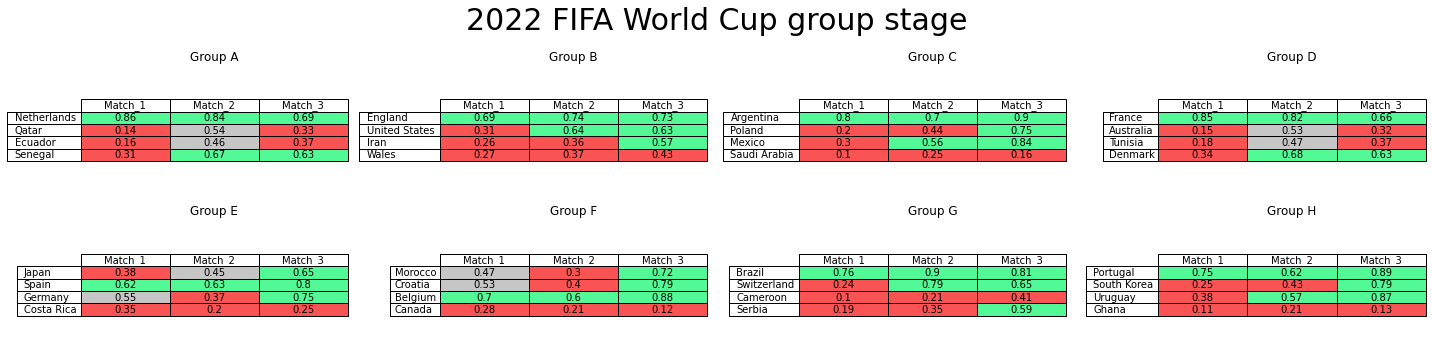

In [96]:
# define figure and axes
fig, ax = plt.subplots(2,4,figsize=(20, 5))

# hide the axes
fig.patch.set_visible(False)

fig.suptitle('2022 FIFA World Cup group stage',size=30)



#Colors; note: red is lose, gray is draw and green is win
red_green = ListedColormap(['#F95353','#C6C6C6', '#53F996'])
bounds = [0,0.45, 0.56, 1] # the value range display color
#convert values into color values
norm = colors.BoundaryNorm(bounds, red_green.N)

# create tables
group=['A','B','C','D','E','F','G','H']
df = [World_cup_df[World_cup_df['Group']==i][['Team','Match_1','Match_2','Match_3']].set_index('Team').round(2) for i in group]
for i in range(8):
    
    ax[i//4][i%4].table(
    cellText=df[i].values,
    colLabels=df[i].columns,
    rowLabels=df[i].index,
    loc='center',
    cellLoc='center',
    cellColours=red_green(norm(df[i].values))
    )
    ax[i//4][i%4].axis('off')
    ax[i//4][i%4].axis('tight')
    ax[i//4][i%4].set_title('Group '+group[i])


fig.tight_layout()
plt.show()

(Note: red is lose, gray is draw and green is win)

Overview:
Take a look at those tables:
- Group A will be Netherlands and Senegal go to next round. It was true that in FIFA WC 2022 Netherlands and Senegal ranked top in this Group.
- Group B , England is the team go to the next round but Wales is predicted to be the next team go to 16 rounds instead of USA.
- Group C , Argentina is true for the team go to the next round but Mexico is ranked second instead of Poland in reality.
- Group D , Danmark and France are true for the teams go to the 16 rounds.
- Group E , Spain is true for the team go to the next round but Germany was the sencond team in this group go to the next round instead of Japan.
- Group F , Croatia is true for the team go to the next round but Belgium was the team in this group go to the next round instead of Morocco.
- Group G, Brazil and Switzerland was true for the next teams go to the next round.
- Group H , Portugal is true fo the ranked first team but Uruaguay was the sencond team go to the next round instead of South Korea.

Next, we continue use those predicted top 2 teams in each group go to the next rounds. So we need to drop all teams not in top 2 in `World_cup_df` by.
- Sort the dataframe by `Group`,`total_prob`, and `points` to push the top 1 and 2 in each group to the top.
- Group 2 first element from each `Group` then we have the dataframe of top 2 teams each groups.
- Set index by `Team` for easy to process next step.

In [97]:
World_cup_df=World_cup_df.sort_values(by=['Group','total_prob','points'],ascending=False)
Next_round_WC=World_cup_df.groupby('Group').nth([0,1])
Next_round_WC=Next_round_WC.reset_index()
Next_round_WC=Next_round_WC.set_index('Team')

#### 5. Simulate the Round of 16 and predict the winner of each match by visualize 2 table at the end.  
We make 2 table to save each match of each group then use `predict_` function to find the winner like the group stage:
- Group A have 4 matches of ranked first this group vs ranked sencond other group (A-B,C-D,E-F,H-G)
- Group B also is opposite of A which have 4 matches of ranked second this group vs ranked first other group.
- But in this time there are no draw matches so:
    - if `home_prob` > 0.5 home team will be the winner 
    - if `away_prob` < 0.5 will be the winner.

In [98]:
sixteen_df_A = pd.DataFrame(columns=['home','away','winner','home_prob'])
sixteen_df_B = pd.DataFrame(columns=['home','away','winner','home_prob'])

def predict_(home,away):
    
    Distance_rank=pd.DataFrame(np.array([[np.nan, np.nan, np.nan]]),columns=X.columns)
    Distance_rank['average_rank']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]+World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])/2
    Distance_rank['rank_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['rank'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['rank'].values[0])
    Distance_rank['point_difference']=(World_cup_rank_df[World_cup_rank_df['country_full']==home]['total_points'].values[0]-World_cup_rank_df[World_cup_rank_df['country_full']==away]['total_points'].values[0])

    home_win_prob = model.predict_proba(Distance_rank)[:,1][0]
    if home_win_prob< 0.5:
        winner=away
    if home_win_prob >= 0.5:
        winner=home
    return pd.DataFrame({'home': [home], 'away': [away],'winner': [winner],'home_prob': [home_win_prob]})

for i in range (0,15,4):
    home_A=Next_round_WC.index[i]
    away_A=Next_round_WC.index[i+3]
    
    home_B=Next_round_WC.index[i+1]
    away_B=Next_round_WC.index[i+2]

    sixteen_df_A=sixteen_df_A.append(predict_(home_A,away_A),ignore_index = True)
    sixteen_df_B=sixteen_df_B.append(predict_(home_B,away_B),ignore_index = True)



After finding 2 dataframe for each group then we set index by `winner` and concatnate to a `Next_round_df` for using in Quater,Semi,Final stage.

In [ ]:
sixteen_df_A=sixteen_df_A.set_index('winner')
sixteen_df_B=sixteen_df_B.set_index('winner')
Next_round_df=pd.concat([sixteen_df_A, sixteen_df_B])

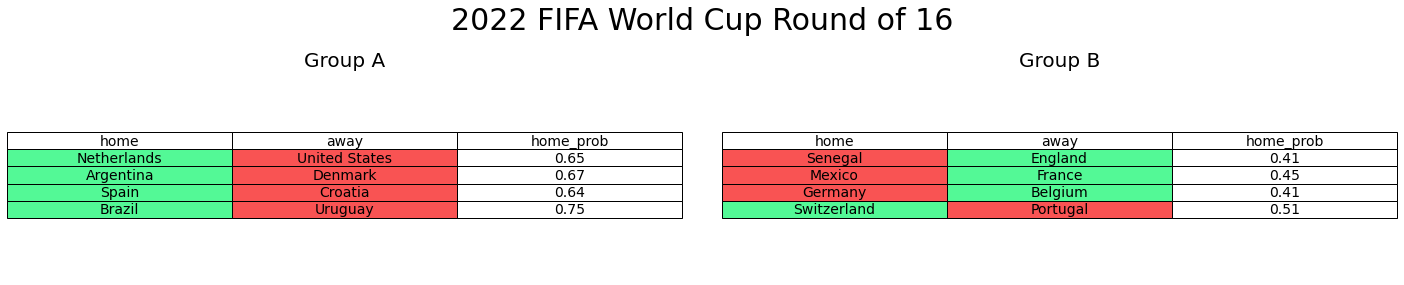

In [99]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

# hide the axes
fig.patch.set_visible(False)


# Colors will display;(Note: red is lose and green is won)
red_green = ListedColormap(['#F95353','white', '#53F996'])
bounds = [-10,-1,1,10]
#convert values into color values
norm = colors.BoundaryNorm(bounds, red_green.N)

df=[sixteen_df_A,sixteen_df_B]
fig.suptitle('2022 FIFA World Cup Round of 16',size=30)

# create table
for i in range(2):
    temp_df = np.zeros(df[i].shape)
    df[i].iloc[:,2]=df[i].iloc[:,2].round(2)
    for row in range(df[i].shape[0]):
        # value >0.5 mean that team win
        if df[i].iloc[row,2]>0.5:
            temp_df[row,0]=10
            temp_df[row,1]=-10
        else:
            temp_df[row,0]=-10
            temp_df[row,1]=10

    table=ax[i].table(
    cellText=df[i].values,
    colLabels=df[i].columns,
    loc='center',
    cellLoc='center',
    cellColours=red_green(norm(temp_df)),
    fontsize=20,
 
    )
    table.scale(1.5, 1.5)
    table.set_fontsize(14)
    ax[i].axis('off')
    ax[i].axis('tight')


ax[0].set_title('Group A',size=20)
ax[1].set_title('Group B',size=20)

fig.tight_layout()
plt.show()

(Note: red is lose and green is won)

Take a look at the Round of 16 table above: (Those information based on our prediction from the group stage)
- Argentina and Brazil which are the top team in South America affirm their position to have a chance to go to the Semi-final Round.
- The rest of winner teams come from Europe which is the most strongest continent in Football.

In [100]:
sixteen_df_B

,home,away,home_prob
winner,,,
England,Senegal,England,0.41
France,Mexico,France,0.45
Belgium,Germany,Belgium,0.41
Switzerland,Switzerland,Portugal,0.51


#### 6. Now two winner of each match sorted beside from top to bottom respectively will pair up a match for next rounds from Quater stage to Final stage:
- Create 3 dataframe of each stage `quater-final`,`semi-final`, and `final` with empty columns `home`,`away`,`winner`, and `home_prob`.
- Create a loop in range 3 corresponding to 3 final stages.
- Using `predict_` function to predict the winner of each match.

In [101]:

Quater_df = pd.DataFrame(columns=['home','away','winner','home_prob'])
Semi_df = pd.DataFrame(columns=['home','away','winner','home_prob'])
Final_df = pd.DataFrame(columns=['home','away','winner','home_prob'])
for f in range(3):
    winner=[]
    for i in range(int(Next_round_df.shape[0]/2)):
        home=Next_round_df.index[i*2]
        away=Next_round_df.index[i*2+1]
        if(f==0): # Quater stage
            Quater_df=Quater_df.append(predict_(home,away),ignore_index = True)
            winner=Quater_df['winner'].tolist()
        elif(f==1): # Semi-final stage
            Semi_df=Semi_df.append(predict_(home,away),ignore_index=True)
            winner=Semi_df['winner'].tolist()
        elif(f==2): # Final stage
            Final_df=Final_df.append(predict_(home,away),ignore_index=True)
    Next_round_df=Next_round_df.loc[winner] # Initial new winner of each stage for the next_round_df

,home,away,winner,home_prob
0,Netherlands,Argentina,Argentina,0.488881
1,Spain,Brazil,Brazil,0.449666
2,England,France,England,0.542368
3,Belgium,Switzerland,Belgium,0.742252


In [102]:
Semi_df

,home,away,winner,home_prob
0,Argentina,Brazil,Argentina,0.510583
1,England,Belgium,Belgium,0.491079


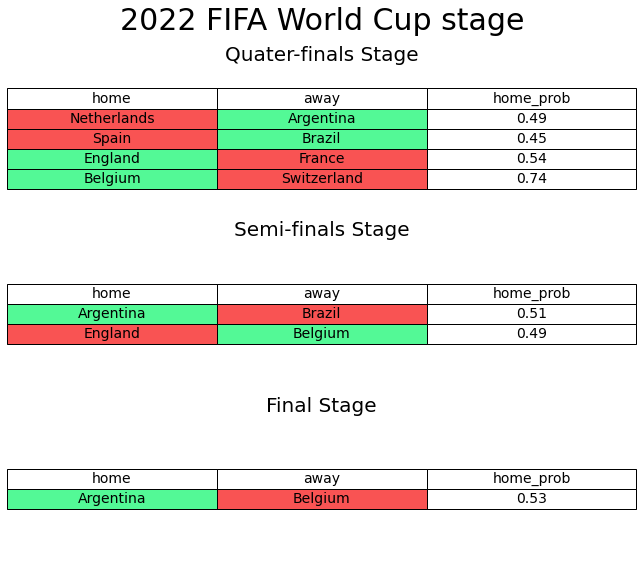

In [103]:
# Change dateframe to correct formal
Quater_df=Quater_df.set_index('winner')
Semi_df=Semi_df.set_index('winner')
Final_df=Final_df.set_index('winner')

fig, ax = plt.subplots(3,1,figsize=(10,8))

# hide the axes
fig.patch.set_visible(False)

# Colors; (Note: red is lose and green is won)
red_green = ListedColormap(['#F95353','white', '#53F996'])

bounds = [-10,-1,1,10]
norm = colors.BoundaryNorm(bounds, red_green.N)

df=[Quater_df,Semi_df,Final_df]

fig.suptitle('2022 FIFA World Cup stage',size=30)
for i in range(3):
    temp_df = np.zeros(df[i].shape)
    df[i].iloc[:,2]=df[i].iloc[:,2].round(2)
    for row in range(df[i].shape[0]):
        # value >0.5 mean that team win
        if df[i].iloc[row,2]>0.5:
            temp_df[row,0]=10
            temp_df[row,1]=-10
        else:
            temp_df[row,0]=-10
            temp_df[row,1]=10

    table=ax[i].table(
    cellText=df[i].values,
    colLabels=df[i].columns,
    loc='center',
    cellLoc='center',
    cellColours=red_green(norm(temp_df)),
    fontsize=20,
 
    )
    table.scale(1.5, 1.5)
    table.set_fontsize(14)
    ax[i].axis('off')
    ax[i].axis('tight')


ax[0].set_title('Quater-finals Stage',size=20)
ax[1].set_title('Semi-finals Stage',size=20)
ax[2].set_title('Final Stage',size=20)

fig.tight_layout()
plt.show()

(Note: red is lose and green is won)

Final result: 
- After the final stage the champion of the World Cup 2022 is Belgium (Just by my predicting result from group stage). 

### Conclusion: 
The accuracy on test is about 70% and on the training is about 72%. This model is quite good for giving a acceptable prediction on the winner of the match. Regarding the group stage , our prediction are matching 11 teams from true result from FIFA Qatar World Cup Group stage. Because the ability of team not only base on data which they experienecd each match but also belong to their passion , tenacity, teamwork and strong-will to overcome top competitors and have a chance to go next. So I think we can use this model for the next time for predicting whether our team(I mean we are fan of this team) could win the next match. (Not use this for betting or gambling please)

## 6. Reflection:
- First of all, we would like to thank the teachers who taught us useful knowledge for this project, thank you, who commented and gave us suggestions so that we could complete this project and your words. Last thanks to MART JÜRISOO for always updating the data so often and quickly so that we can work on this project and test our predictions as soon as possible.


- Because of our teammates have worked in sync with each other and have approximately the same amount of knowledge. We have same difficulties.
- The difficulties: 
    - There are four data file, and this is the first time we use that much data files in a project, so that we find difficult to create suitable dataframes by merging other dataframes and it take quite much time to link things together. And because of alot data files, preprocessing takes the most time.
    - There alot of function of we do not know clearly how to use and finding suitable function to process our requirement is also hard job special in visualize. Those thing take alot time of our team.
    - It is hard to "planning data". Our plan, questions, problems have been changed so many time. For example, we had planned to find the team being good at penalty shootout, but when we processed data to analyze the problem and find that each team has very few penalty match, almost teams have less than 4 penalty shootout matchs and won less than 2, so that we did not have enough information to answer the problem and had to removed that problem.
    - Modeling requires many factors to predict and the results are quite different from reality.
- Have learned:
    - We have learn much more about preprocessing, visualizing and functions of libraries to do that.
    - How to manage tasks of project on github.
    - More experince in teamwork, planning and way to present problems. We have been make so much meetings.
    - It is also like way for us to practice English.
- If had more time: We both want to improve the model further, adding more input constraints, more attributes, and more thorough preprocessing.

## 7. References:
- Data and hints: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv
- Introduction of Predicting Football Match Winners With Machine Learning And Python: https://www.youtube.com/watch?v=0irmDBWLrco
- Visualize tables: https://stackoverflow.com/questions/72930097/how-to-add-color-to-specific-range-of-table-columns-in-matplotlib
- How to combine 2 items in a loop: https://www.geeksforgeeks.org/python-itertools-combinations-function/